## Sales Analysis - Sample Superstore Dataset

### Questions

Q1. What is the overall sales trend?

Q2. Which are the Top 10 products by sales?

Q3. Which are the Most Selling Products?

Q4. Which is the most preferred Ship Mode?

Q5. Which are the Most Profitable Category and Sub-Category?

Q6. Top countries - Using Profit Ratio and Average Price per item

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
sales = pd.read_excel("C:\\Users\\ofagb\\OneDrive\\Documents\\Python\\superstore_sales.xlsx")
sales

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


### Exploratory Data Analysis

In [3]:
#checking dtpyes and for null values
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [4]:
#checking for duplicated rows
duplicateRows = sales[sales.duplicated()]
duplicateRows

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


In [5]:
### extracting vital date info from df
sales['month_year'] = sales['order_date'].dt.to_period('M')
sales['sales_quarter'] = sales['order_date'].dt.quarter
sales['sales_month'] = sales['order_date'].dt.month_name()
sales['sales_day'] = sales['order_date'].dt.day_name()

#calculating prep time
sales['delivery_days'] = sales['ship_date'] - sales['order_date']
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,discount,profit,shipping_cost,order_priority,year,month_year,sales_quarter,sales_month,sales_day,delivery_days
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,0.0,106.140,35.46,Medium,2011,2011-01,1,January,Saturday,5 days
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,0.1,36.036,9.72,Medium,2011,2011-01,1,January,Saturday,7 days
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,0.0,29.640,8.17,High,2011,2011-01,1,January,Saturday,4 days
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,0.5,-26.055,4.82,High,2011,2011-01,1,January,Saturday,4 days
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,0.1,37.770,4.70,Medium,2011,2011-01,1,January,Saturday,7 days


In [6]:
sales.nunique()

order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales             27200
quantity             14
discount             29
profit            28234
shipping_cost     17095
order_priority        4
year                  4
month_year           48
sales_quarter         4
sales_month          12
sales_day             7
delivery_days         8
dtype: int64

In [7]:
sales.dtypes

order_id                   object
order_date         datetime64[ns]
ship_date          datetime64[ns]
ship_mode                  object
customer_name              object
segment                    object
state                      object
country                    object
market                     object
region                     object
product_id                 object
category                   object
sub_category               object
product_name               object
sales                     float64
quantity                    int64
discount                  float64
profit                    float64
shipping_cost             float64
order_priority             object
year                        int64
month_year              period[M]
sales_quarter               int64
sales_month                object
sales_day                  object
delivery_days     timedelta64[ns]
dtype: object

In [8]:
sales_duration = sales['order_date'].max() - sales['order_date'].min()
sales_duration

Timedelta('1460 days 00:00:00')

#### Question 1 - Overall sales trend

In [9]:
#first groupby the new month-year column
sales_trend = sales.groupby('month_year').sum().reset_index()
sales_trend

,month_year,sales,quantity,discount,profit,shipping_cost,year,sales_quarter
0,2011-01,98898.48886,1463,68.758,8321.80096,10544.78800,870763,433
1,2011-02,91152.15698,1224,52.252,12417.90698,10681.16300,760158,378
2,2011-03,145729.36736,1836,74.212,15303.56826,13096.18550,1083929,539
3,2011-04,116915.76418,2020,80.782,12902.32438,12954.52000,1134204,1128
4,2011-05,146747.83610,2013,82.382,12183.82870,16443.20600,1138226,1132
5,2011-06,215207.38022,3112,159.534,23415.24702,23813.10900,1844087,1834
6,2011-07,115510.41912,1774,80.086,5585.00352,11844.47600,995445,1485
7,2011-08,207581.49122,3035,121.462,23713.66772,22001.13600,1765658,2634
8,2011-09,290214.45534,3707,137.678,35776.88394,29664.85100,2115572,3156
9,2011-10,199071.26404,2727,110.192,25963.41834,21380.08200,1556514,3096


In [10]:
sales_trend.dtypes

month_year       period[M]
sales              float64
quantity             int64
discount           float64
profit             float64
shipping_cost      float64
year                 int64
sales_quarter        int64
dtype: object

In [11]:
#before visualizing trend, period[M] dtype as to be converted to datetime dtype
sales_trend['month_year'] = sales_trend['month_year'].astype(str)
sales_trend['month_year'] = pd.to_datetime(sales_trend['month_year'])

sales_trend.dtypes

month_year       datetime64[ns]
sales                   float64
quantity                  int64
discount                float64
profit                  float64
shipping_cost           float64
year                      int64
sales_quarter             int64
dtype: object

Text(0.5, 1.0, 'Sales Trend')

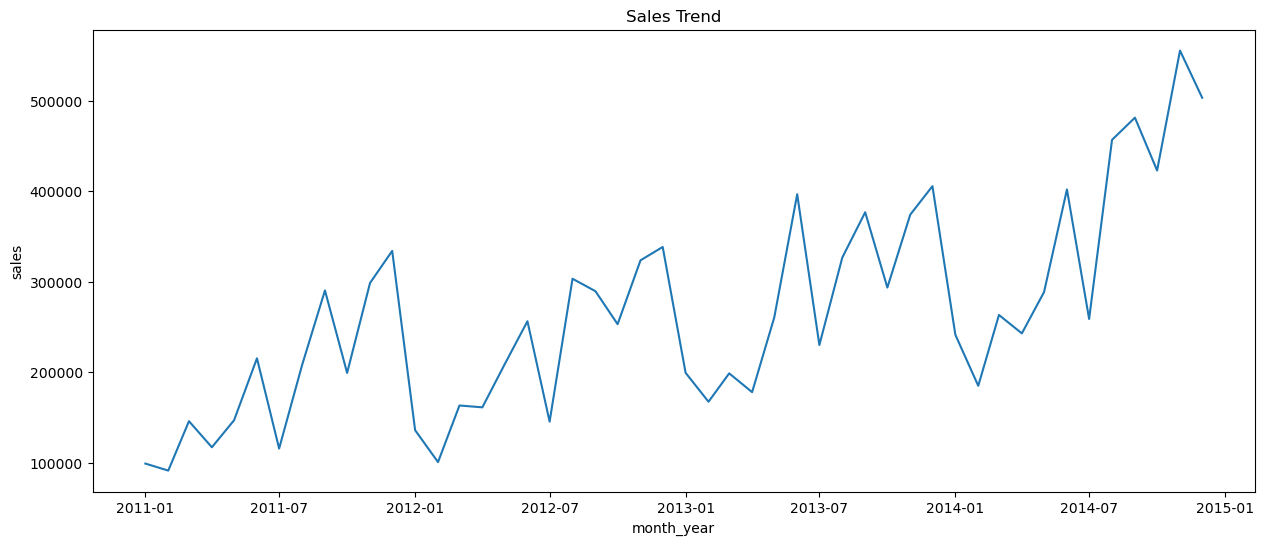

In [12]:
fig, ax = plt.subplots(figsize = (15,6))
sns.lineplot(data=sales_trend, x="month_year", y="sales")
ax.set_title( "Sales Trend")

**Comment** - Sales have 5Xed in the last 4 years, growing from *100k* to just over $500k. There are ususally dips at the start of the year in January and also mid-year in July but the sales bounces back each time to grow even stronger to finish the year.

#### Question 2 - Which are the Top 10 products by sales?

In [13]:
prod_sales = sales.groupby('product_name').sum().reset_index()
prod_sales

,product_name,sales,quantity,discount,profit,shipping_cost,year,sales_quarter
0,"""While you Were Out"" Message Book, One Form pe...",25.228,8,0.4,10.3880,3.10,6042,11
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,0.4,16.7678,2.09,8052,11
2,#10 Self-Seal White Envelopes,108.682,10,0.2,52.1230,11.43,8053,12
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,0.4,223.1408,53.03,14088,18
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,0.8,115.2806,34.95,20124,31
...,...,...,...,...,...,...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660,24,0.4,115.6440,28.12,10064,16
3784,iOttie HLCRIO102 Car Mount,215.892,12,0.8,-11.9940,51.19,10062,16
3785,iOttie XL Car Mount,223.888,14,0.4,-50.3748,18.64,4028,7
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554,29,1.2,171.2648,40.78,14091,20


In [14]:
#sort prod_sales df in descending order and select top 10 by sales
prod_sales_sorted = prod_sales.sort_values('sales', ascending = False)
prod_sales_sorted.head(10)

,product_name,sales,quantity,discount,profit,shipping_cost,year,sales_quarter
310,"Apple Smart Phone, Full Size",86935.7786,171,5.44,5921.5786,8027.71500,102654,150
970,"Cisco Smart Phone, Full Size",76441.5306,139,2.07,17238.5206,7065.16600,76495,110
2415,"Motorola Smart Phone, Full Size",73156.3030,134,5.61,17027.1130,8817.33100,76498,100
2501,"Nokia Smart Phone, Full Size",71904.5555,147,6.79,9938.1955,7852.66300,94594,141
866,Canon imageCLASS 2200 Advanced Copier,61599.8240,20,0.60,25199.9280,1276.32054,10068,15
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841,169,8.11,5997.2541,5751.54100,98638,132
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840,141,6.47,4710.9840,5141.73400,90577,124
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160,142,6.98,10427.3260,6548.16500,78499,107
2988,"Samsung Smart Phone, Cordless",48653.4600,108,3.26,-198.0900,5892.07400,52319,79
2502,"Nokia Smart Phone, with Caller ID",47877.7857,96,3.54,9465.3257,5321.11000,48301,77


In [15]:
solution = prod_sales_sorted[['product_name', 'sales']]
solution.head(10)

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


#### Question 3 - Top Selling Products by Quantity

In [16]:
prod_qty = sales.groupby('product_name').sum().reset_index()
prod_qty

,product_name,sales,quantity,discount,profit,shipping_cost,year,sales_quarter
0,"""While you Were Out"" Message Book, One Form pe...",25.228,8,0.4,10.3880,3.10,6042,11
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,0.4,16.7678,2.09,8052,11
2,#10 Self-Seal White Envelopes,108.682,10,0.2,52.1230,11.43,8053,12
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,0.4,223.1408,53.03,14088,18
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,0.8,115.2806,34.95,20124,31
...,...,...,...,...,...,...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660,24,0.4,115.6440,28.12,10064,16
3784,iOttie HLCRIO102 Car Mount,215.892,12,0.8,-11.9940,51.19,10062,16
3785,iOttie XL Car Mount,223.888,14,0.4,-50.3748,18.64,4028,7
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554,29,1.2,171.2648,40.78,14091,20


In [17]:
#sort prod_sales df in descending order and select top 10 by sales
prod_qty_sorted = prod_sales.sort_values('quantity', ascending = False)
prod_qty_sorted.head(10)

,product_name,sales,quantity,discount,profit,shipping_cost,year,sales_quarter
3275,Staples,7008.2000,876,21.20,2611.0694,731.430,456868,649
894,"Cardinal Index Tab, Clear",1922.8302,337,10.32,556.3702,208.345,185186,249
1210,"Eldon File Cart, Single Width",34387.7287,321,8.82,4238.8887,3970.841,181155,231
2840,"Rogers File Cart, Single Width",29466.3053,262,16.26,2394.8953,3136.280,169085,221
3070,"Sanford Pencil Sharpener, Water Color",5581.9741,259,10.66,601.9441,570.373,161008,213
3335,"Stockwell Paper Clips, Assorted Sizes",2395.4378,253,9.86,251.2878,269.211,130844,183
446,"Avery Index Tab, Clear",1312.9488,252,9.01,221.5388,140.505,148956,206
1981,"Ibico Index Tab, Clear",1807.1811,251,10.71,125.6411,193.248,167045,213
3179,"Smead File Cart, Single Width",25397.1708,250,13.06,-237.6692,3036.454,154992,211
3266,"Stanley Pencil Sharpener, Water Color",5537.2290,242,5.57,125.5390,520.203,150966,206


In [18]:
solution3 = prod_qty_sorted[['product_name', 'quantity']]
solution3.head(10)

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


#### Question 4 - Preferred Ship Mode

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64


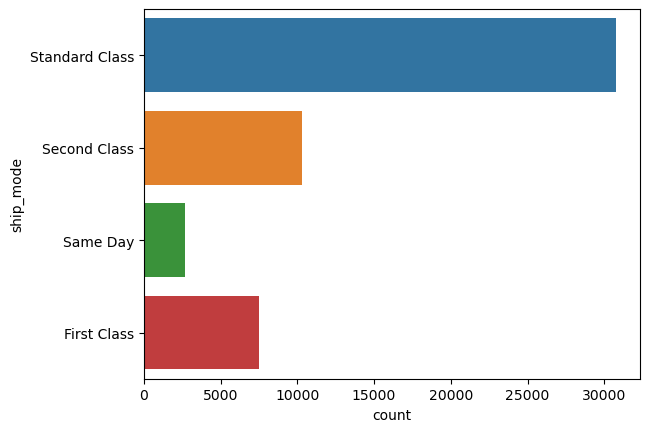

In [19]:
#visualizing company status
sns.countplot(y = 'ship_mode', data = sales)
plt.title = 'Preferred Ship Mode'

#No of companies in each status category
print(sales['ship_mode'].value_counts())

**Comment** - Standard class with 30,775 shipments is the most preferred ship mode during the period under review

#### Question 5 - Which are the Most Profitable Category and Sub-Category?

In [20]:
profit_cat_subcat = sales.groupby(['category', 'sub_category']).sum()[['profit']]
profit_cat_subcat

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15010.51200
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580

In [21]:
sorted_df = profit_cat_subcat.sort_values(['category', 'profit'], ascending = False)
sorted_df

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

#### Question 6: Top Countries- using profit ratio and average price per item

In [27]:
geo_sales = sales.groupby('country').sum()[['sales', 'profit', 'quantity']]
geo_sales

,sales,profit,quantity
country,,,
Afghanistan,21673.32000,5460.30000,228
Albania,3888.12000,709.32000,40
Algeria,36091.59000,9106.50000,454
Angola,25554.00000,6494.97000,317
Argentina,57511.78328,-18693.79672,1504
...,...,...,...
Venezuela,26587.82956,-11222.71044,774
Vietnam,65800.19940,-1870.23060,996
Yemen,2465.71200,-3706.45800,71


In [28]:
#creating new columns for profit ratio and average price per item
geo_sales['profit_ratio'] = geo_sales['profit']/geo_sales['sales']
geo_sales['average_price'] = geo_sales['sales']/geo_sales['quantity']

#viewing new df
geo_sales.head()

,sales,profit,quantity,profit_ratio,average_price
country,,,,,
Afghanistan,21673.32000,5460.30000,228,0.251936,95.058421
Albania,3888.12000,709.32000,40,0.182433,97.203000
Algeria,36091.59000,9106.50000,454,0.252316,79.496894
Angola,25554.00000,6494.97000,317,0.254166,80.611987
Argentina,57511.78328,-18693.79672,1504,-0.325043,38.239218


In [31]:
#top 10 countries using profit_ratio
geo_sales_PR = geo_sales.sort_values('profit_ratio', ascending = False)

geo_sales_PR2= geo_sales_PR[['profit_ratio']]
geo_sales_PR2.head(10)

,profit_ratio
country,
Armenia,0.440766
Mauritania,0.416807
Eritrea,0.405880
Slovenia,0.401404
Burundi,0.385029
Tunisia,0.341949
Ethiopia,0.341116
Kyrgyzstan,0.339839
Belarus,0.338729


In [36]:
#top 10 countries average price per item
geo_sales_qty = geo_sales.sort_values('average_price', ascending = False)

geo_sales_qty2= geo_sales_qty[['average_price']]
geo_sales_qty2.head(10)

,average_price
country,
Montenegro,308.028462
Lesotho,291.825652
South Sudan,209.124000
Estonia,186.660000
Guinea-Bissau,158.880000
Central African Republic,158.504000
Lebanon,155.370000
Taiwan,147.069808
Mauritania,138.652759


In [50]:
top_subcat_region = sales.groupby(['region', 'sub_category']).sum()[['sales']]
top_subcat_region

sales
region sub_category           
Africa Accessories   42172.092
       Appliances    62186.376
       Art           38435.793
       Binders       22312.944
       Bookcases     83457.408
...                        ...
West   Paper         26663.718
       Phones        98684.352
       Storage       70532.852
       Supplies      18127.122
       Tables        84754.562

[221 rows x 1 columns]

In [51]:
sorted_df2 = top_subcat_region.sort_values(['region', 'sub_category'], ascending = False)
sorted_df2

sales
region sub_category           
West   Tables        84754.562
       Supplies      18127.122
       Storage       70532.852
       Phones        98684.352
       Paper         26663.718
...                        ...
Africa Bookcases     83457.408
       Binders       22312.944
       Art           38435.793
       Appliances    62186.376
       Accessories   42172.092

[221 rows x 1 columns]